# Discussion 5
## This is just a demonstration how to solve the homework using the iris.csv that we previously used in Discussion 2

## Exercise 1 : Data Understanding (23 points in total)
* As the classes are categorical, use one-hot encoding to represent the set of classes. 
* Normalize each field of the input data using the min-max normalization technique.
* Plot the distribution of data and analyze the distribution. Explain if the data is symmetric, or sekewed to right or left. 
* Plot the target (class) variable and show if data has linear or non-linear behavior. Suggest whether a linear or non-linear model should be developed for the data. 

In [2]:
import sys
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

np.set_printoptions(threshold=sys.maxsize)

dataset = pd.read_csv("iris.csv")

X = dataset.drop('species', axis = 1)
y = dataset['species']
print(X)
print(y)

     sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]
0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object


In [3]:
set_of_classes = y.value_counts().index.tolist()
set_of_classes= pd.DataFrame({'Class': set_of_classes})
y_dum = pd.get_dummies(y,dtype=int)

oec = OneHotEncoder()
y_onehot = oec.fit(np.asarray(y).reshape(-1, 1))
y_onehot = oec.transform(np.asarray(y).reshape(-1, 1)).toarray()

print("Pre-processed class :")
print(y)
print(y_onehot)

Pre-processed class :
0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 

In [4]:
scaler = MinMaxScaler(feature_range=(0, 1))
X_rescaled = scaler.fit_transform(X)
X_rescaled = pd.DataFrame(data = X_rescaled, columns = X.columns)
print(X_rescaled)

     sepal_length  sepal_width  petal_length  petal_width
0        0.222222     0.625000      0.067797     0.041667
1        0.166667     0.416667      0.067797     0.041667
2        0.111111     0.500000      0.050847     0.041667
3        0.083333     0.458333      0.084746     0.041667
4        0.194444     0.666667      0.067797     0.041667
..            ...          ...           ...          ...
145      0.666667     0.416667      0.711864     0.916667
146      0.555556     0.208333      0.677966     0.750000
147      0.611111     0.416667      0.711864     0.791667
148      0.527778     0.583333      0.745763     0.916667
149      0.444444     0.416667      0.694915     0.708333

[150 rows x 4 columns]


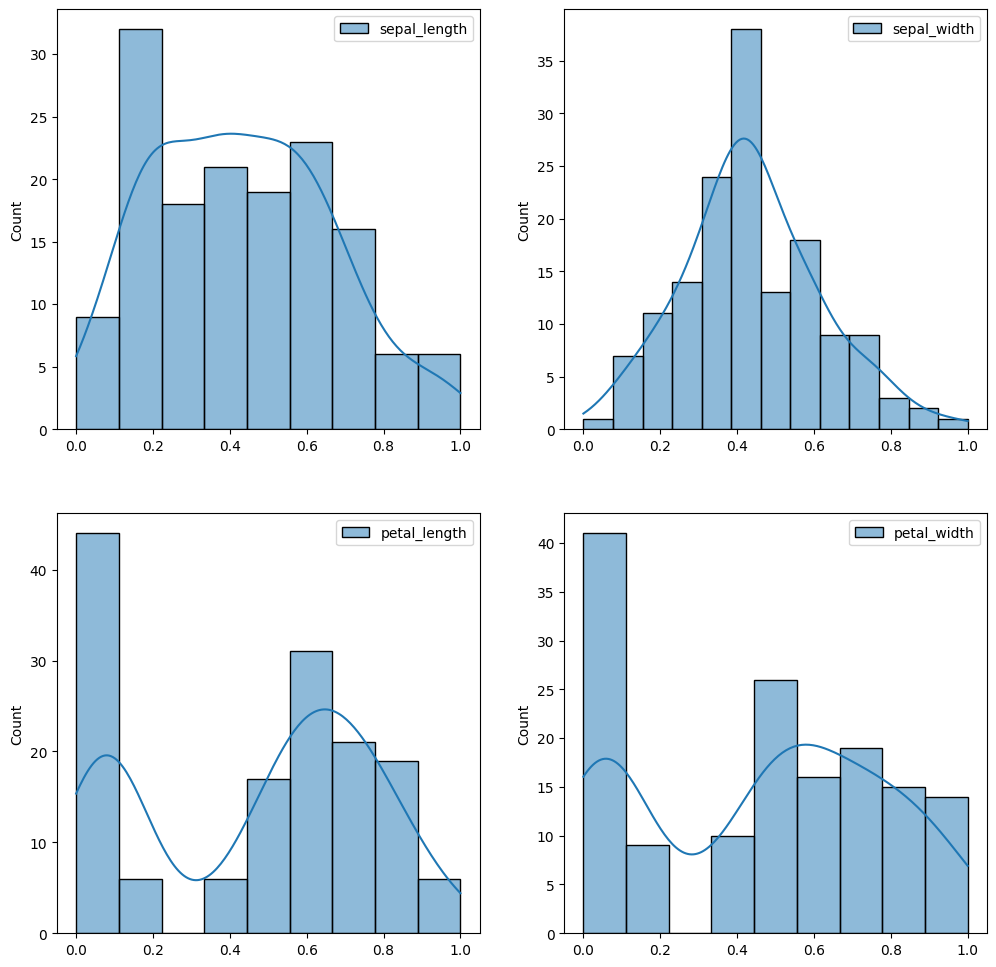

In [5]:
fig, axes = plt.subplots(2,2, figsize=(12,12))
axes = axes.flatten()

# Loop to create subplots
i = 0
for item in X_rescaled.items():
    sns.histplot(item, kde=True, ax=axes[i])
    i+=1

plt.show()

## Exercise 2 - Logistic Regression (20 points in total)
Recall the dataset from last week homework (Discussion use iris.csv)

Now we are going to build a classification model on ``species`` using all the other 4 attributes. <br >
Note that Logistic Regression is a binary classificaiton algorithm.

### Exercise 2.1 - Processing and Splitting the Dataset (5 points)
In this exercise 3, we only consider those species of "versicolor" or "virginica". <br >
So please **remove** those species that belong to "setosa". <br >
And then, split the data into training and testing set with the ratio of 70:30. <br >

In [1]:
df = pd.read_csv('iris.csv')

data = df.copy().loc[(df['species'] != 'setosa'), :]
train, test = train_test_split(data, test_size=0.3, random_state=21)
# The remaining
X_train, y_train = train.drop(columns=['species']) ,train['species']
X_test, y_test = test.drop(columns=['species']), test['species']

NameError: name 'pd' is not defined

### Exercise 3.2 - Logistic Regression (15 points)

Using all the other 4 attributes, please build a Logistic Regression model that distinguishes between flowers in versicolor versus virginica. <br >

Requirements
 - Report the testing precision and recall for both species.

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

cls = LogisticRegression()
cls.fit(X_train, y_train)
print(classification_report(y_test, cls.predict(X_test)))

              precision    recall  f1-score   support

  versicolor       1.00      0.90      0.95        21
   virginica       0.82      1.00      0.90         9

    accuracy                           0.93        30
   macro avg       0.91      0.95      0.93        30
weighted avg       0.95      0.93      0.94        30



**precision**: proportion of TP to the total number of positive predictions (TP+FP) <br>
**recall**: true positive rate, which is the proportion of true positive (TP) 
predictions to the total number of actual positive instances (TP+FN)

## Exercise 3 : Polynomial Regression using Gradient Descent (30 points in total)
Now we are going to look into model fitting. In the dataset cost.csv, the first column is the independent variable cost, and the second column is the dependent variable production_output.

## Exercise 3.1 : Split the dataset (5 points)
Import the dataset cost.csv and split them into training and testing set with ratio 70:30.

## Exercise 3.2 : Polynomial Regression (25 points)
Compute the RMSE and R2 for the training and testing set. Using polynomial regression with degree 1, 2, 3, and 4, which model provides the most appropriate prediction? Justify your answer and plot the models fitted line.

### here is the demo of how to find rmse and r2


In [16]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


df = pd.read_csv('BeijingAQI.csv') 

train, test = train_test_split(df, test_size=0.3, random_state=21)
X_train, y_train = train.drop(columns=['NO2', 'loc']), train['NO2']
X_test, y_test = test.drop(columns=['NO2', 'loc']), test['NO2']
X_train, X_test = X_train["PM10"], X_test["PM10"]


poly = PolynomialFeatures(degree=5, include_bias=False)
X_poly = poly.fit_transform(np.asarray(X_train).reshape(-1, 1))
plr = LinearRegression()

plr.fit(X_poly, np.asarray(y_train).reshape(-1, 1))
    
predicted = plr.predict(poly.transform(np.asarray(X_test).reshape(-1, 1)))


In [18]:
mse = mean_squared_error(y_test,predicted)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,predicted)
print('RMSE: %8.15f' % rmse)
print('R2: %8.15f' % r2)

RMSE: 17.552425243921622
R2: 0.661467971116535
